In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from ipywidgets import interact,widgets                # For interactive execution of code

In [2]:
import os
os.getcwd()

'/home/guest/MachineLearning/demos/notebooks'

In [3]:
# Read in the data
data = pd.read_csv("../data/heart.csv")

In [4]:
# Take a look at the first lines
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Describe the dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Split into features and targets
features = data.drop("target",axis=1)
target = data["target"]

# Split into train and test set (50 test samples)
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=50,random_state=0)

### Grid search 

In [7]:
from sklearn.model_selection import GridSearchCV

# The base model we want to test
model = LogisticRegression(max_iter=1000)
# All the parameters we want to test
parameters = [{"C":np.linspace(0.01,20,10), # linspace will evenly space values between a start and a stop. 
                                            # In this case 10 values evenly spaced between 0.01 and 20
              "penalty":["l1","l2"], # All penalties we want to check, we could also add `None` 
              "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}] # The solvers to use 
                                                                            # (different underlying algorithms, see docs)

# Constructing the grid search "model"
grid_search = GridSearchCV(estimator=model,             # The base model
                           cv=5,                        # Number of cross fold validations
                           param_grid=parameters,       # Different parameters to test
                           n_jobs=-1,                   # Number of threads to use (-1: all)
                           verbose=5,                   # How much information do we want to show? See docs for more info
                           scoring="balanced_accuracy") # What score will the model be evaluated on?
                                                        # See: https://scikit-learn.org/stable/modules/classes.html?highlight=metric#module-sklearn.metrics
# Fit the training data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gues

[CV 2/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.610 total time=   0.0s
[CV 3/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.725 total time=   0.0s
[CV 5/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.625 total time=   0.0s
[CV 2/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.636 total time=   0.0s
[CV 4/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.810 total time=   0.0s
[CV 5/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.769 total time=   0.0s
[CV 5/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.769 total time=   0.1s
[CV 1/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.711 total time=   0.0s
[CV 2/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.636 total time=   0.0s
[CV 3/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.790 total time=   0.0s
[CV 1/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.689 total time=   0.1s
[CV 2/5] END ...

/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Inc

[CV 1/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.790 total time=   0.0s
[CV 3/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.790 total time=   0.1s
[CV 4/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.810 total time=   0.1s
[CV 4/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.810 total time=   0.1s
[CV 5/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.716 total time=   0.1s
[CV 1/5] END C=2.231111111111111, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=2.231111111111111, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=2.231111111111111, penalty=l2, solver=newton-cg;, score=0.769 total time=   0.0s
[CV 3/5] END C=2.231111111111111, penalty=l2, solver=newton-cg;, score=0.877 total time=   0.0s
[CV 4/5] END C=2.231111111111111, penalty=l2, solver=newton-cg;, score=0.810 total time=   0.0s
[CV 5/5] END C=2.231111111111111, pe

/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gues

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-02, 2.23111111e+00, 4.45222222e+00, 6.67333333e+00,
       8.89444444e+00, 1.11155556e+01, 1.33366667e+01, 1.55577778e+01,
       1.77788889e+01, 2.00000000e+01]),
                          'penalty': ['l1', 'l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             scoring='balanced_accuracy', verbose=5)

In [8]:
# Print the score on test set (best model of our grid search)
print(f"Score of best model: {grid_search.score(X_test,y_test)}")

# Predict values for test set for best model
y_pred=grid_search.predict(X_test)

# Print classification report
print("\nClassification report:")
print(classification_report(y_test,y_pred))

# What where the best parameters for out model?
print("\nBest parameters:")
print(grid_search.best_params_)
print(grid_search.best_estimator_)

Score of best model: 0.8400000000000001

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        25
           1       0.81      0.88      0.85        25

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50


Best parameters:
{'C': 2.231111111111111, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=2.231111111111111, max_iter=1000, solver='liblinear')


### Randomized search 

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# The base models
model = LogisticRegression(max_iter=1000)

# You can also evaluate different things for different models.
# You can add in seperate parameters that can be combined like this: paramaters=[{Set 1 of params},{Set 2 of params}]
# Note that in grid search we got a lot of errors, mainly complaining that "lbfgs" solver cannot use L1 regularisation.
# Here we removed this solver from the first set and added in another set of params, with only lbfgs and L2, but still 
# changing the C value!
parameters = [
              #Set 1
              {"C":uniform(0.01,20),# Uniform: a uniform distribution of values between a minimum and maximum. Needed for
                                    # the random search
              "penalty":["l1","l2"],
              "solver":["newton-cg", "liblinear", "sag", "saga"]},
    
              #Set 2
              {"C":uniform(0.01,20),
              "penalty":["l2"],
              "solver":["lbfgs"]}
             ]

# Number of models (before CV) to evaluate
n_iter_search = 100

# The random search "model", similar to the grid search
random_search = RandomizedSearchCV(estimator=model,
                                   cv=5,
                                   param_distributions=parameters,
                                   n_iter=n_iter_search,
                                   n_jobs=-1,
                                   verbose=5)
# Fit on the training set
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

[CV 4/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.810 total time=   0.0s
[CV 5/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.752 total time=   0.0s
[CV 5/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.752 total time=   0.1s
[CV 1/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.711 total time=   0.1s
[CV 2/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.596 total time=   0.1s
[CV 3/5] END ...C=0.01, penalty=l2, solver=saga;, score=0.751 total time=   0.2s
[CV 5/5] END C=2.231111111111111, penalty=l2, solver=lbfgs;, score=0.797 total time=   0.3s
[CV 1/5] END C=2.231111111111111, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 2/5] END C=2.231111111111111, penalty=l2, solver=liblinear;, score=0.786 total time=   0.0s
[CV 3/5] END C=2.231111111111111, penalty=l2, solver=liblinear;, score=0.917 total time=   0.0s
[CV 4/5] END C=2.231111111111111, penalty=l2, sol

/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

[CV 2/5] END C=13.336666666666666, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 3/5] END C=13.336666666666666, penalty=l1, solver=liblinear;, score=0.859 total time=   0.0s
[CV 4/5] END C=13.336666666666666, penalty=l1, solver=liblinear;, score=0.833 total time=   0.0s
[CV 5/5] END C=13.336666666666666, penalty=l1, solver=liblinear;, score=0.797 total time=   0.0s
[CV 1/5] END C=13.336666666666666, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=13.336666666666666, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=13.336666666666666, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=13.336666666666666, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=13.336666666666666, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=13.336666666666666, penalty=l1, solver=saga;, score=0.689 total time=   0.1s
[CV 2/5] END C=13.336666666666666, penalty=l1, solver=saga;, score=0.614 to

/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

[CV 5/5] END C=11.115555555555554, penalty=l2, solver=liblinear;, score=0.797 total time=   0.0s
[CV 1/5] END C=11.115555555555554, penalty=l2, solver=sag;, score=0.733 total time=   0.1s
[CV 2/5] END C=11.115555555555554, penalty=l2, solver=sag;, score=0.672 total time=   0.1s
[CV 5/5] END C=13.336666666666666, penalty=l1, solver=saga;, score=0.716 total time=   0.1s
[CV 1/5] END C=13.336666666666666, penalty=l2, solver=newton-cg;, score=0.816 total time=   0.0s
[CV 2/5] END C=13.336666666666666, penalty=l2, solver=newton-cg;, score=0.769 total time=   0.0s
[CV 3/5] END C=13.336666666666666, penalty=l2, solver=newton-cg;, score=0.859 total time=   0.0s
[CV 4/5] END C=13.336666666666666, penalty=l2, solver=newton-cg;, score=0.833 total time=   0.1s
[CV 5/5] END C=13.336666666666666, penalty=l2, solver=newton-cg;, score=0.797 total time=   0.0s
[CV 1/5] END C=13.336666666666666, penalty=l2, solver=lbfgs;, score=0.794 total time=   0.2s
[CV 2/5] END C=13.336666666666666, penalty=l2, solv

/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn

[CV 2/5] END C=17.77888888888889, penalty=l2, solver=liblinear;, score=0.808 total time=   0.0s
[CV 3/5] END C=17.77888888888889, penalty=l2, solver=liblinear;, score=0.877 total time=   0.0s
[CV 4/5] END C=17.77888888888889, penalty=l2, solver=liblinear;, score=0.833 total time=   0.0s
[CV 5/5] END C=17.77888888888889, penalty=l2, solver=liblinear;, score=0.797 total time=   0.0s
[CV 1/5] END C=17.77888888888889, penalty=l2, solver=sag;, score=0.733 total time=   0.1s
[CV 2/5] END C=17.77888888888889, penalty=l2, solver=sag;, score=0.672 total time=   0.1s
[CV 3/5] END C=17.77888888888889, penalty=l2, solver=sag;, score=0.812 total time=   0.1s
[CV 4/5] END C=17.77888888888889, penalty=l2, solver=sag;, score=0.851 total time=   0.1s
[CV 5/5] END C=17.77888888888889, penalty=l2, solver=sag;, score=0.756 total time=   0.1s
[CV 1/5] END C=17.77888888888889, penalty=l2, solver=saga;, score=0.689 total time=   0.1s
[CV 2/5] END C=17.77888888888889, penalty=l2, solver=saga;, score=0.614 tot

/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data 

[CV 3/5] END C=13.34307648422073, penalty=l2, solver=lbfgs;, score=0.863 total time=   0.2s
[CV 1/5] END C=14.075229917369066, penalty=l2, solver=liblinear;, score=0.804 total time=   0.0s
[CV 2/5] END C=14.075229917369066, penalty=l2, solver=liblinear;, score=0.824 total time=   0.0s
[CV 4/5] END C=14.075229917369066, penalty=l2, solver=liblinear;, score=0.840 total time=   0.0s
[CV 1/5] END C=8.921481440529929, penalty=l2, solver=lbfgs;, score=0.824 total time=   0.4s
[CV 2/5] END C=8.921481440529929, penalty=l2, solver=lbfgs;, score=0.784 total time=   0.2s
[CV 5/5] END C=14.915684384833243, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.2s
[CV 1/5] END C=3.272742565761476, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=15.140034082509764, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.2s
[CV 1/5] END C=12.644121640704567, penalty=l2, solver=lbfgs;, score=0.824 total time=   0.3s
[CV 2/5] END C=12.644121640704567, penalty=l2, solver=lbfgs;

/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn

[CV 2/5] END C=19.631138422565705, penalty=l2, solver=saga;, score=0.627 total time=   0.1s
[CV 5/5] END C=7.889517488113152, penalty=l1, solver=saga;, score=0.720 total time=   0.1s
[CV 1/5] END C=8.352216018299833, penalty=l2, solver=sag;, score=0.745 total time=   0.1s
[CV 2/5] END C=8.352216018299833, penalty=l2, solver=sag;, score=0.686 total time=   0.1s
[CV 3/5] END C=8.352216018299833, penalty=l2, solver=sag;, score=0.824 total time=   0.1s
[CV 2/5] END C=0.03521073895394244, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.03521073895394244, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.03521073895394244, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.03521073895394244, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=5.495901131303996, penalty=l1, solver=saga;, score=0.706 total time=   0.1s
[CV 2/5] END C=5.495901131303996, penalty=l1, solver=saga;, score=0.627 total time=   0.1s
[CV 3

/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

[CV 3/5] END C=15.742166818743842, penalty=l2, solver=lbfgs;, score=0.863 total time=   0.2s
[CV 2/5] END C=18.002243328281555, penalty=l2, solver=lbfgs;, score=0.784 total time=   0.5s
[CV 2/5] END C=1.2481519021531595, penalty=l2, solver=lbfgs;, score=0.784 total time=   0.4s
[CV 3/5] END C=14.221735581493547, penalty=l2, solver=lbfgs;, score=0.863 total time=   0.3s
[CV 2/5] END C=15.428174666410962, penalty=l2, solver=lbfgs;, score=0.804 total time=   0.2s
[CV 2/5] END C=9.200196819034803, penalty=l2, solver=lbfgs;, score=0.804 total time=   0.2s
[CV 1/5] END C=12.453417656394889, penalty=l2, solver=liblinear;, score=0.804 total time=   0.0s
[CV 2/5] END C=12.453417656394889, penalty=l2, solver=liblinear;, score=0.824 total time=   0.0s
[CV 3/5] END C=12.453417656394889, penalty=l2, solver=liblinear;, score=0.882 total time=   0.0s
[CV 4/5] END C=12.453417656394889, penalty=l2, solver=liblinear;, score=0.840 total time=   0.0s
[CV 5/5] END C=12.453417656394889, penalty=l2, solver=l

/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
                   n_iter=100, n_jobs=-1,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f63f5b4ae70>,
                                         'penalty': ['l1', 'l2'],
                                         'solver': ['newton-cg', 'liblinear',
                                                    'sag', 'saga']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f643750f0b0>,
                                         'penalty': ['l2'],
                                         'solver': ['lbfgs']}],
                   verbose=5)

In [10]:
# Print score of the best model on test set
print(f"Score of best model: {random_search.score(X_test,y_test)}")

# Predict the classes for the test set
y_pred=random_search.predict(X_test)

# Print the classification report
print("\nClassification report:")
print(classification_report(y_test,y_pred))

# Show the best classifier parameters
print("\nBest parameters:")
print(random_search.best_params_)
print(random_search.best_estimator_)

Score of best model: 0.84

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        25
           1       0.81      0.88      0.85        25

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50


Best parameters:
{'C': 4.793267089359397, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=4.793267089359397, max_iter=1000, solver='liblinear')


### Bayes optimization 

In [11]:
%pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [12]:
# sed -i 's/np.int/int/g' '~/miniconda3/envs/bit07/lib/python3.12/site-packages/skopt/space/transformers.py'

In [13]:
from skopt import BayesSearchCV
from skopt.space import Real,Categorical

# The base model
model = LogisticRegression(max_iter=1000)

# The parameters
parameters = [{"C":Real(0.01,20,prior="uniform"), #Instead of uniform, we now need to use Real with prior uniform
              "solver":Categorical(["newton-cg", "lbfgs", "liblinear", "sag", "saga"])}] 
                      # Instead of normal list, we now need to wrap it into a Categorical
    
# Number of searches our model is allowed to do
n_iter_search = 100

# The bayes_search 'model' similar to grid and random search
bayes_search = BayesSearchCV(estimator=model,
                                   cv=5,
                                   search_spaces=parameters,
                                   n_iter=n_iter_search,
                                   n_jobs=-1,
                                   verbose=5)
# Fit on the training data
bayes_search.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gues

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 5/5] END C=15.698639284296076, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.2s
[CV 4/5] END C=6.105919643059513, penalty=l2, solver=newton-cg;, score=0.840 total time=   0.0s
[CV 5/5] END C=6.105919643059513, penalty=l2, solver=newton-cg;, score=0.800 total time=   0.0s
[CV 1/5] END C=15.197738803615305, penalty=l2, solver=liblinear;, score=0.804 total time=   0.0s
[CV 2/5] END C=15.197738803615305, penalty=l2, solver=liblinear;, score=0.824 total time=   0.0s
[CV 3/5] END C=15.197738803615305, penalty=l2, solver=liblinear;, score=0.882 total time=   0.0s
[CV 4/5] END C=15.197738803615305, penalty=l2, solver=liblinear;, score=0.840 total time=   0.0s
[CV 5/5] END C=15.197738803615305, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/5] END C=18.013455358338216, penalty=l2, solver=sag;, score=0.745 total time=   0.0s
[CV 2/5] END C=18.013455358338216, penalty=l2, solver=sag;, score=0.686 total ti

/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gues

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 5/5] END C=12.829793870299891, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.2s
[CV 3/5] END C=2.06602693575466, penalty=l2, solver=saga;, score=0.765 total time=   0.1s
[CV 4/5] END C=2.06602693575466, penalty=l2, solver=saga;, score=0.840 total time=   0.1s
[CV 5/5] END C=2.06602693575466, penalty=l2, solver=saga;, score=0.720 total time=   0.1s
[CV 1/5] END C=13.75394438576825, penalty=l2, solver=liblinear;, score=0.804 total time=   0.0s
[CV 2/5] END C=13.75394438576825, penalty=l2, solver=liblinear;, score=0.824 total time=   0.0s
[CV 3/5] END C=13.75394438576825, penalty=l2, solver=liblinear;, score=0.882 total time=   0.0s
[CV 4/5] END C=13.75394438576825, penalty=l2, solver=liblinear;, score=0.840 total time=   0.0s
[CV 5/5] END C=13.75394438576825, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/5] END C=4.12279741348298, penalt

/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 2/5] END C=14.05411347674763, penalty=l2, solver=liblinear;, score=0.824 total time=   0.0s
[CV 5/5] END C=17.448461982218372, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.3s
[CV 1/5] END C=5.43730221983585, penalty=l2, solver=newton-cg;, score=0.804 total time=   0.0s
[CV 2/5] END C=5.43730221983585, penalty=l2, solver=newton-cg;, score=0.784 total time=   0.0s
[CV 3/5] END C=5.43730221983585, penalty=l2, solver=newton-cg;, score=0.863 total time=   0.0s
[CV 4/5] END C=14.103183484163825, penalty=l2, solver=lbfgs;, score=0.840 total time=   0.2s
[CV 5/5] END C=14.10

/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..C=2.4083387072729074, solver=sag;, score=0.745 total time=   0.0s
[CV 5/5] END ..C=2.4083387072729074, solver=sag;, score=0.760 total time=   0.0s
[CV 4/5] END ..C=3.5385061539643416, solver=sag;, score=0.860 total time=   0.1s
[CV 2/5] END ..........C=20.0, solver=liblinear;, score=0.824 total time=   0.0s
[CV 5/5] END ..........C=20.0, solver=liblinear;, score=0.800 total time=   0.0s
[CV 2/5] END C=0.026725010470457708, solver=liblinear;, score=0.686 total time=   0.0s
[CV 3/5] END ..........C=20.0, solver=newton-cg;, score=0.863 total time=   0.1s
[CV 4/5] END ..........C=20.0, solver=liblinear;, score=0.840 total time=   0.0s
[CV 3/5] END ...............C=20.0, solver=saga;, score=0.765 total time=   0.2s
[CV 3/5] END ..........C=20.0, solver=liblinear;, score=0.882 total time=   0.0s
[CV 2/5] END ..............C=20.0, solver=lbfgs;, score=0.804 total time=   0.2s
[CV 5/5] END ..............C=20.0, solver=lb

/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/guest/miniconda3/envs/bit07/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 4/5] END C=4.630697369104716, penalty=l2, solver=lbfgs;, score=0.820 total time=   0.1s
[CV 5/5] END C=4.630697369104716, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.2s
[CV 1/5] END C=11.377722775862777, penalty=l2, solver=lbfgs;, score=0.824 total time=   0.2s
[CV 4/5] END C=12.249529482295433, solver=liblinear;, score=0.840 total time=   0.0s
[CV 2/5] END C=13.497926770277841, solver=newton-cg;, score=0.784 total time=   0.0s
[CV 3/5] END C=6.0932586202892285, solver=liblinear;, score=0.902 total time=   0.0s
[CV 3/5] END C=16.126441156112087, solver=lbfgs;, score=0.863 total time=   0.2s
[CV 1/5] END C=13.454275962478688, solver=newton-cg;, score=0.824 total time=   0.0s
[CV 5/5] END C=13.454275962478688, solver=newton-cg;, score=0.800 total time=   0.0s
[CV 4/5] END .C=4.712691915763278, solver=lbfgs;, score=0.840 total time=   0.3s
[CV 2/5] END ...C=

BayesSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_iter=100,
              n_jobs=-1,
              search_spaces=[{'C': Real(low=0.01, high=20, prior='uniform', transform='normalize'),
                              'solver': Categorical(categories=('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'), prior=None)}],
              verbose=5)

In [14]:
# Print the sores of the best model
print(f"Score of best model: {bayes_search.score(X_test,y_test)}")

# Predict the classes of test set
y_pred=bayes_search.predict(X_test)

# Print classification report
print("\nClassification report:")
print(classification_report(y_test,y_pred))

#Print the best parameters
print("\nBest parameters:")
print(bayes_search.best_params_)
print(bayes_search.best_estimator_)

Score of best model: 0.84

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        25
           1       0.81      0.88      0.85        25

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50


Best parameters:
OrderedDict({'C': 3.145805569702704, 'solver': 'liblinear'})
LogisticRegression(C=3.145805569702704, max_iter=1000, solver='liblinear')
[CV 5/5] END C=3.002920199214989, solver=liblinear;, score=0.820 total time=   0.0s
[CV 4/5] END C=3.002976369284996, solver=liblinear;, score=0.860 total time=   0.0s
[CV 1/5] END C=3.002997697139485, solver=liblinear;, score=0.804 total time=   0.0s
[CV 5/5] END C=3.002997697139485, solver=liblinear;, score=0.820 total time=   0.0s
[CV 2/5] END C=15.449609198930672, solver=liblinear;, score=0.824 total time=   0.0s
[CV 1/5] END C=3.0024380549643004, solver=liblin

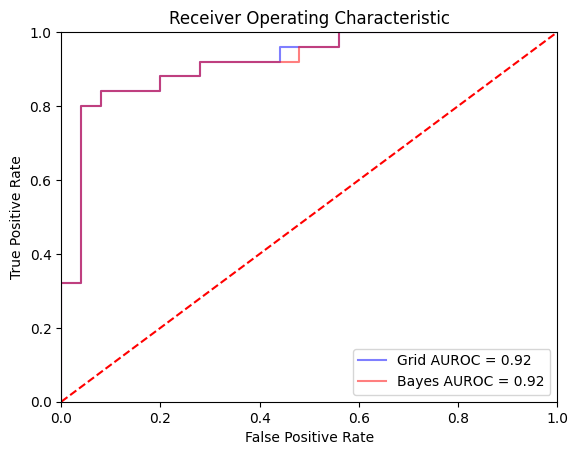

In [15]:
# ROC

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

# Get the probabilities for the grid search from earlier on
probs_grid = grid_search.predict_proba(X_test)
# Keep only those of the 'true' class, so the second column: [:,1] => all rows, column 1 (zero based so actually second col)
preds_grid = probs_grid[:,1]
# Calculate false and true positives using this information
fpr_grid, tpr_grid, threshold_grid = metrics.roc_curve(y_test, preds_grid)
# Calculare Area Under the Curve (AUC)
roc_auc_grid = metrics.auc(fpr_grid, tpr_grid)

# Do exactly the same for the bayes search model
probs_bayes = bayes_search.predict_proba(X_test)
preds_bayes = probs_bayes[:,1]
fpr_bayes, tpr_bayes, threshold_bayes = metrics.roc_curve(y_test, preds_bayes)
roc_auc_bayes = metrics.auc(fpr_bayes, tpr_bayes)

# plot the ROC curve, also add a legend, titles and a diagonal dotted line representing 50/50 chance
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_grid, tpr_grid, 'b', alpha=0.5, label = 'Grid AUROC = %0.2f' % roc_auc_grid)
plt.plot(fpr_bayes, tpr_bayes, 'r', alpha=0.5, label = 'Bayes AUROC = %0.2f' % roc_auc_bayes)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
# Interactive ROC
# This roc will show you where we land on the graph if we use a different treshold. So basically how this graph is
# constructed.

import matplotlib.pyplot as plt
import sklearn.metrics as metrics

Total_positives=sum(y_test)
Total_negatives=sum([1 for x in y_test if x==0 ])

@interact(Treshold=(0,1,0.01))
def drawROC(Treshold=0.5):
    probs_bayes = bayes_search.predict_proba(X_test)
    preds_bayes = probs_bayes[:,1]
    fpr_bayes, tpr_bayes, threshold_bayes = metrics.roc_curve(y_test, preds_bayes)
    roc_auc_bayes = metrics.auc(fpr_bayes, tpr_bayes)
    
    pred_treshold = [0 if x<Treshold else 1 for x in probs_bayes[:,1]]
    true_positives = sum([1 for x,y in zip(y_test,pred_treshold) if x==y==1])
    true_negatives = sum([1 for x,y in zip(y_test,pred_treshold) if x==y==0])
    
    print("TPR: ",tpr:=true_positives/Total_positives)
    print("FPR: ",fpr:=1-true_negatives/Total_negatives)
    # plot the curve
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr_bayes, tpr_bayes, 'r', alpha=0.5, label = 'Bayes AUC = %0.2f' % roc_auc_bayes)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.scatter(fpr,tpr)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

interactive(children=(FloatSlider(value=0.5, description='Treshold', max=1.0, step=0.01), Output()), _dom_clas…